# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [26]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values #Burada slice kullanılır ve 1 alınır sadece.



### Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler  #Verileri scaling yapıyoruz ki aradaki uçuk sayılar modeli yanıltmasın diye.
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled) #0 ve 1 arasında

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [28]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i , 0 ]) #Buradaki olay şu bu 60.değer ve geri kalan değerler 59-58-57 diye gidiyor...Çıktıda mevcut zaten
    y_train.append(training_set_scaled[i, 0])
X_train,y_train = np.array(X_train), np.array(y_train)
print(X_train)
print("--------")
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
--------
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #RNN tabanlı model için uygun formata getiriyoruz.
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [31]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [32]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1))) #input_shape = LSTM katmanına gelen verinin bouyutunu belirtir.
regressor.add(Dropout(0.2)) #Overfitting'i önlemek için dropout kullanılır.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [33]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [34]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [35]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [36]:
regressor.add(Dense(units=1)) #fully connected layer


### Compiling the RNN

In [37]:
regressor.compile(optimizer='adam' , loss='mean_squared_error') #loss'da kullandığımız genelde regresyon problemlerinde yaygın olarak kullanılır .

### Fitting the RNN to the Training set

In [38]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32) #batch ile 32'lik gruplar halinde işler ve epoch ile 100 kez gözden geçirilir.

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - loss: 0.0937
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0074
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0060
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 0.0064
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.0050
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0047
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0053
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0049
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0050
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0050
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0042
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0045
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [39]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [40]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


### Visualising the results

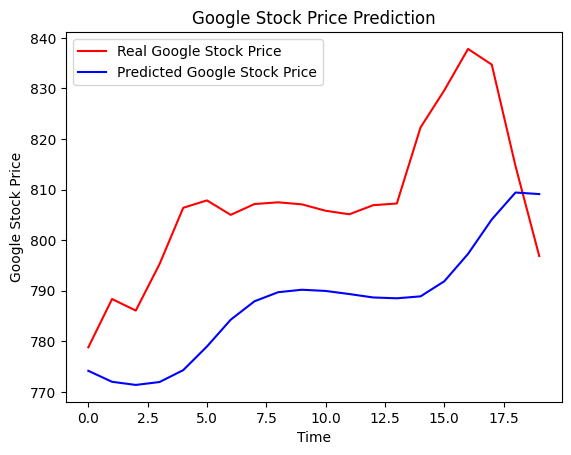

In [41]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()